Este colab fue desarrollado por Arnold Charry Armero

# Comquat Company

Comquat posee cuatro plantas de producción en las que personal
se producen las computadoras. Comquat puede vender hasta 20.000
computadoras por año a un precio de $3,500 por computadora. Para
cada planta la capacidad de producción, el costo de producción por
computadora y el costo fijo de operar una planta durante un año
se dan en la Tabla 17. Determine cómo Comquat puede
maximizar sus ganancias anuales de la producción de computadoras.

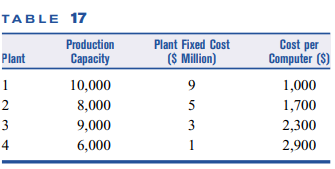

## Conjuntos

$ i = \text{Unidades producidas en la planta } i$

## Parámetros

$ I_{i} = \textrm{Ingreso de vender un computador en la planta } i $

$ CV_{i} = \textrm{Costo de producir un computador en la planta } i$

$ CF_{i} = \textrm{Costo fijo de colocar la planta } i $

$ C_{i} = \textrm{Capacidad de la planta } i $

## Variables de decisión

$ x_{i} = \textrm{Cantidad de computadores vendidos por planta } i $

$ y_{i} = \textrm{1 se abre la planta } i \textrm{, 0 lo contrario} $

## Función Objetivo

$$ \textrm{Max } z = \sum_{i = 1}^{n} I_{i}\: x_{i} - \sum_{i = 1}^{n} CV_{i}\: x_{i} - \sum_{i = 1}^{n} CF_{i}\: y_{i}$$

## Restricciones

Restricción de flujo de que si no se tiene la planta, no hay producción,

$$ x_{i} \leq M_{i} \:y_{i}, \forall i $$

Se pueden producir hasta 20000 unidades al mes,

$$ \sum_{i = 1}^{n} x_{i} = 20000 $$

La producción no puede rebasar la capacidad,

$$ x_{i} \leq C_{i}, \forall i $$

In [1]:
#Se instala la libreria
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 18.0 MB/s eta 0:00:00


In [2]:
#Se importa la libreria
from pulp import *

In [3]:
#Conjuntos
plantas = range(4)

In [8]:
#Parámetros

I = [3500, 3500, 3500, 3500]

CV = [1000, 1700, 2300, 2900]

CF = [9000000, 5000000, 3000000, 1000000]

C = [10000, 8000, 9000, 6000]

In [11]:
# Crear la instancia del modelo
model = LpProblem(name="Comquat_Company", sense=LpMaximize)

# Inicialización de las variables de decisión
X = LpVariable.dicts("X", (plantas), 0, None, LpInteger)
Y = LpVariable.dicts("Y", (plantas), 0, 1, LpInteger)

# Función objetivo
model += lpSum([I[i] * X[i] for i in plantas]) - lpSum([CV[i] * X[i] for i in plantas]) - lpSum([CF[i] * Y[i] for i in plantas])


# Agregar las restricciones
for i in plantas:
  model += X[i] <= C[i] * Y[i]

model += lpSum([X[i] for i in plantas]) == 20000

for i in plantas:
  model += X[i] <= 1000000000 * Y[i]

# Resolver el problema
model.solve()

# Imprimir el estado del problema
print("Status:", LpStatus[model.status])

# Imprimir las variables
for v in model.variables():
    print(v.name, "=", v.varValue)

# Imprimir la función objetivo
print("Utilidades = $", value(model.objective))

Status: Optimal
X_0 = 10000.0
X_1 = 8000.0
X_2 = 0.0
X_3 = 2000.0
Y_0 = 1.0
Y_1 = 1.0
Y_2 = 0.0
Y_3 = 1.0
Utilidades = $ 25600000.0
